In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split
import numpy as np

models={
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
}

In [81]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i]=df[i].astype('category').cat.codes
    elif df[i].dtype == "category":
        df[i]=df[i].astype('category').cat.codes

In [82]:
# Split the dataset by gender
df_male = df[df['gender'] == 1]
df_female = df[df['gender'] == 0]

# Define features and target for each gender
x_male = df_male.drop('math score', axis=1)
y_male = df_male['math score']

x_female = df_female.drop('math score', axis=1)
y_female = df_female['math score']

In [83]:
def BuiltModel(model, x_train, x_test, y_train, y_test):
    clf = model.fit(x_train,y_train)
    pred = model.predict(x_test)

    # Calculate residuals
    residuals = y_test - pred

    r2score = r2_score(y_test,pred)*100
    
    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    mape = mean_absolute_percentage_error(y_test,pred)
    # print("Model :", model)
    # print("MAE :", mae)
    # print("RMSE :", rmse)
    # print("MAPE :",mape)
    # print('------------------------------')

    # r2 score
    # print(f"Testing r2 Score:", r2score,"%")
    # print('------------------------------')

    return pred, residuals

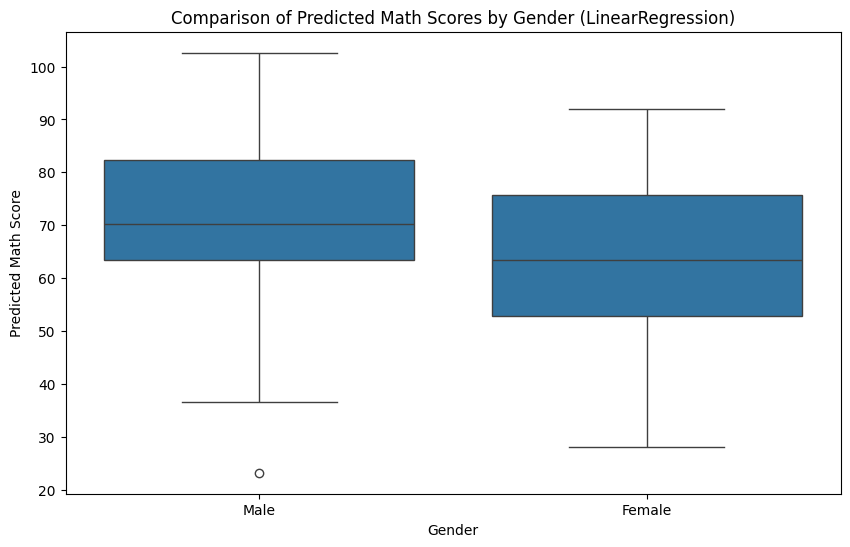

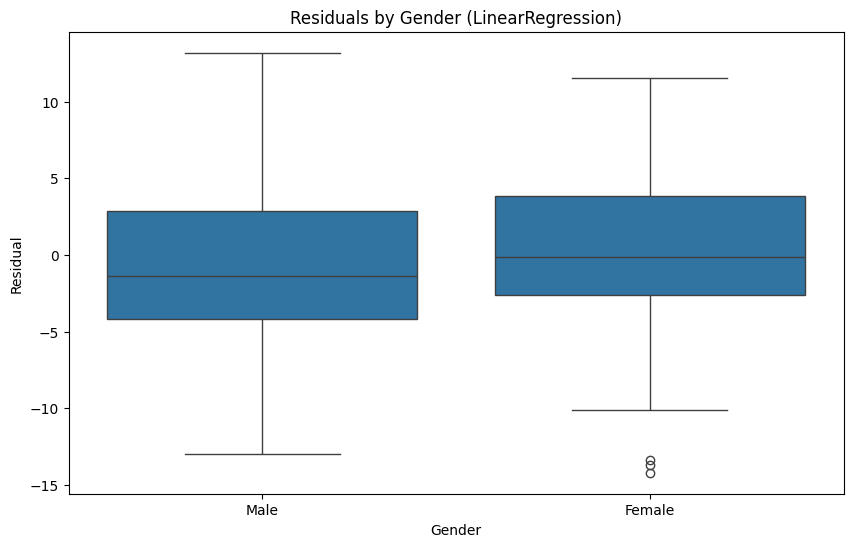

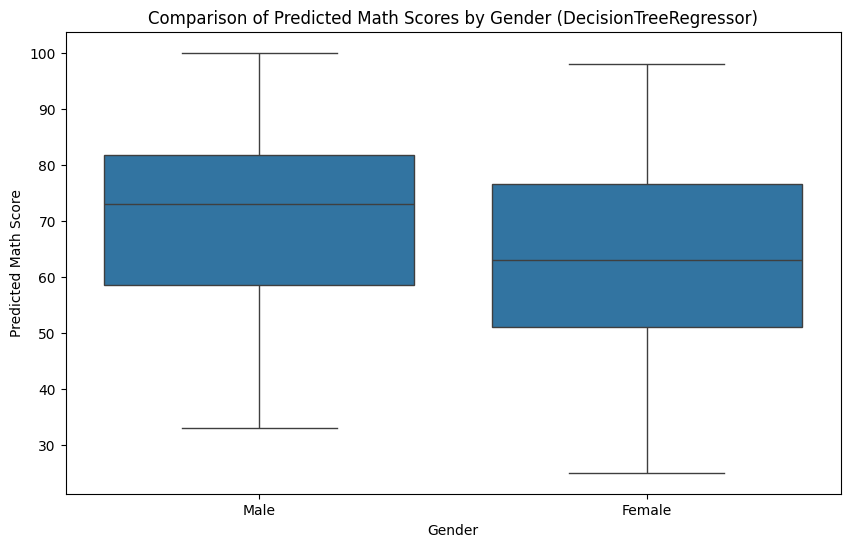

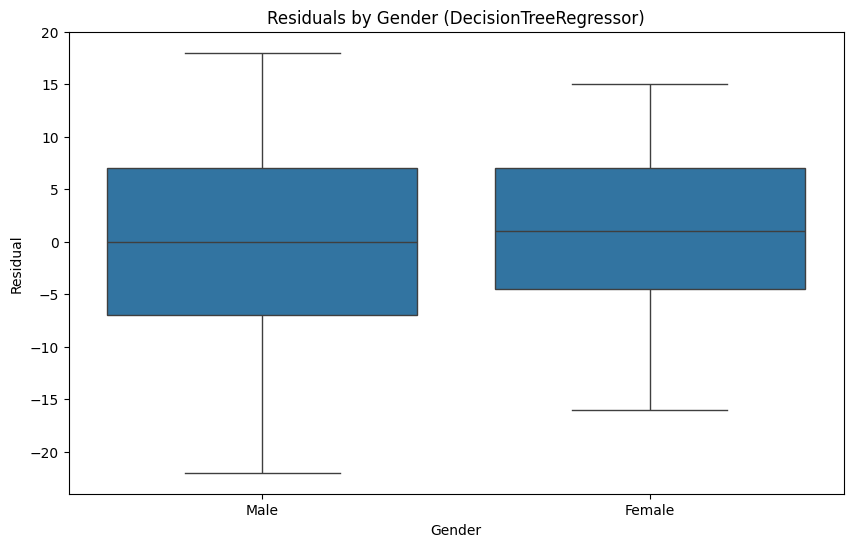

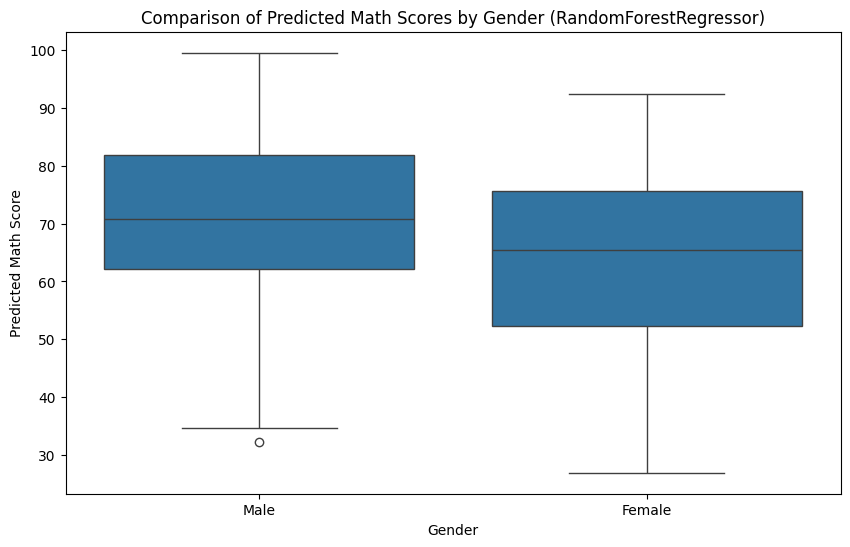

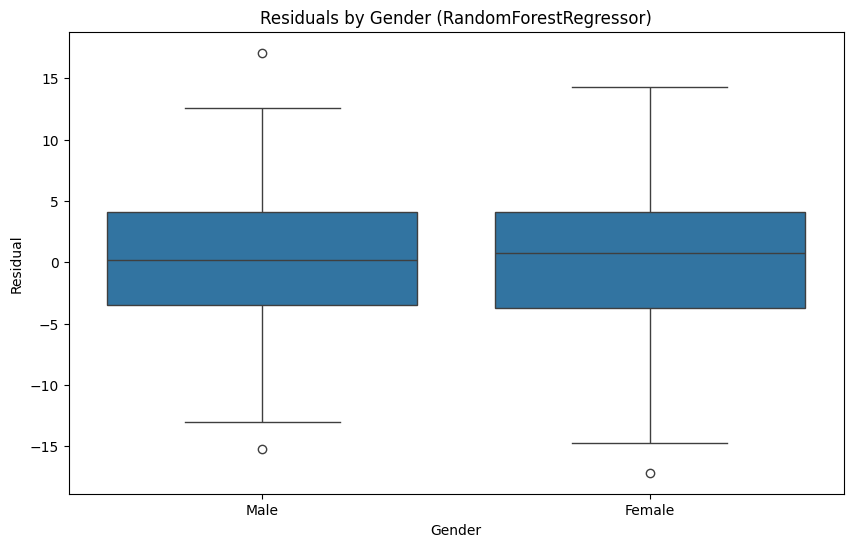

In [84]:
# Split the male dataset into training and testing sets
x_male_train, x_male_test, y_male_train, y_male_test = train_test_split(x_male, y_male, test_size=0.2, random_state=42)

# Split the female dataset into training and testing sets
x_female_train, x_female_test, y_female_train, y_female_test = train_test_split(x_female, y_female, test_size=0.2, random_state=42)

for name, model in models.items():
  # Train and evaluate the model for males
  pred_male, residuals_male = BuiltModel(model, x_male_train, x_male_test, y_male_train, y_male_test)

  # Train and evaluate the model for females
  pred_female, residuals_female = BuiltModel(model, x_female_train, x_female_test, y_female_train, y_female_test)

  results_male = pd.DataFrame({
      'Gender': 'Male',
      'Actual Math Score': y_male_test,
      'Predicted Math Score': pred_male,
      'Residual': residuals_male
  })

  results_female = pd.DataFrame({
      'Gender': 'Female',
      'Actual Math Score': y_female_test,
      'Predicted Math Score': pred_female,
      'Residual': residuals_female
  })

  # Combine results into a single DataFrame
  results_residuals = pd.concat([results_male, results_female], ignore_index=True)

  # Create a DataFrame for the predictions
  results_prediction = pd.DataFrame({
      'Gender': ['Male'] * len(pred_male) + ['Female'] * len(pred_female),
      'Predicted Math Score': np.concatenate([pred_male, pred_female]),
      #'Residual Math Score': list(residuals_males[:, 0]) + list(residuals_females[:, 0]),

  })

  # Plotting the boxplot
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Gender', y='Predicted Math Score', data=results_prediction)
  plt.title(f'Comparison of Predicted Math Scores by Gender ({name})')
  plt.show()

  # Boxplot of residuals by gender
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Gender', y='Residual', data=results_residuals)
  plt.title(f'Residuals by Gender ({name})')
